# Exploratory Data Analysis of Zomato Data

# Import Libraries

In [1]:
#import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Load Data

In [2]:
import pandas as pd
#load the data
zomato_data = pd.read_csv("zomato.csv")
zomato_data.head() #looking at first five rows of the data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Basic Data Understanding

In [3]:
#basic stats
zomato_data.describe() #only for votes

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [4]:
#get the datatypes of the columns
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [5]:
zomato_data.columns #get the list of all the columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Data Cleaning/Manipulation

In [6]:
#check for any duplicate values
zomato_data.duplicated().sum()

0

In [7]:
#check for missing values
pd.DataFrame(round(zomato_data.isnull().sum()/zomato_data.shape[0] * 100,3), columns = ["Missing"])

,Missing
url,0.000
address,0.000
name,0.000
online_order,0.000
book_table,0.000
rate,15.034
votes,0.000
phone,2.336
location,0.041
rest_type,0.439


In [8]:
zomato_data.drop(["url", "address",  "phone"], axis = 1, inplace = True)

In [9]:
zomato_data.rename(columns={"approx_cost(for two people)": "cost_two", "listed_in(type)":"service_type", "listed_in(city)":"serve_to"}, inplace = True)

In [10]:
#converting the cost_two variable to int.
zomato_data["cost_two"] = zomato_data['cost_two'].str.replace(',','')
zomato_data.cost_two.dtypes

dtype('O')

In [11]:
zomato_data["cost_two"] = zomato_data['cost_two'].str.strip()

In [12]:
zomato_data['cost_two'] = pd.to_numeric(zomato_data['cost_two'],errors = 'coerce', downcast ='signed')

In [13]:
#Manipulating the rate column - rate is read as object, but for analysis we need that to be present in numerical format.

zomato_data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
#removing the "/5" in the rate column
zomato_data.rate = zomato_data.rate.astype('str')
zomato_data.rate = zomato_data.rate.apply(lambda x: x.replace('/5','').strip())

In [15]:
#rate column contains 'NEW' and '-' replacing those with nan and drop those fields without any rating
# Replace "NEW" & "-" to np.nan
import numpy as np
zomato_data.rate.replace(('NEW','-'),np.nan,inplace =True)

In [16]:
#dropping the observations where rate and cost_two is null
zomato_data.dropna(subset = ["rate", "cost_two"], inplace = True)
#Converting Rate Column datetype to float
zomato_data.rate = zomato_data.rate.astype('float')

In [17]:
#online_order and book_table are given as 'Yes' and 'No'. Converting these two True and False for better manipulation.
zomato_data.online_order.replace(('Yes','No'),(True,False),inplace =True)
zomato_data.book_table.replace(('Yes','No'),(True,False),inplace =True)

In [18]:
zomato_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Exploratory Data Analysis

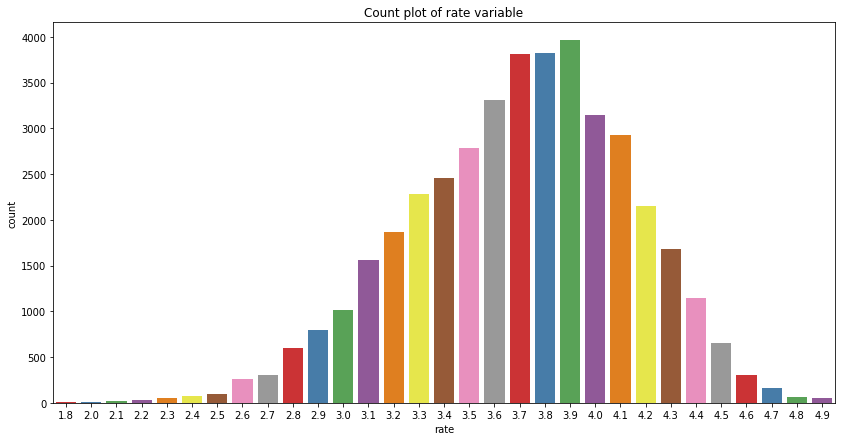

In [19]:
#plot the count of rating.
plt.rcParams['figure.figsize'] = 14,7
sns.countplot(zomato_data["rate"], palette="Set1")
plt.title("Count plot of rate variable")
plt.show()

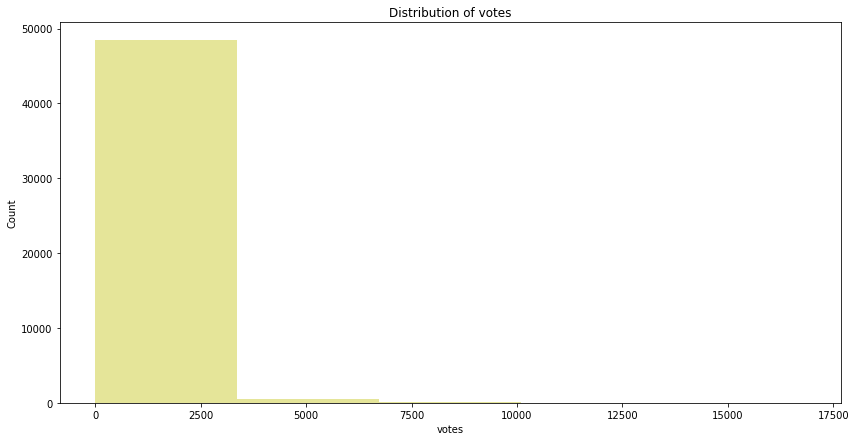

In [20]:
#lets plot the distribution of votes
plt.rcParams['figure.figsize'] = 14,7
sns.distplot(zomato_data["votes"], kde=False,bins=5,color="y")
plt.title("Distribution of votes")
plt.ylabel("Count")
plt.show()

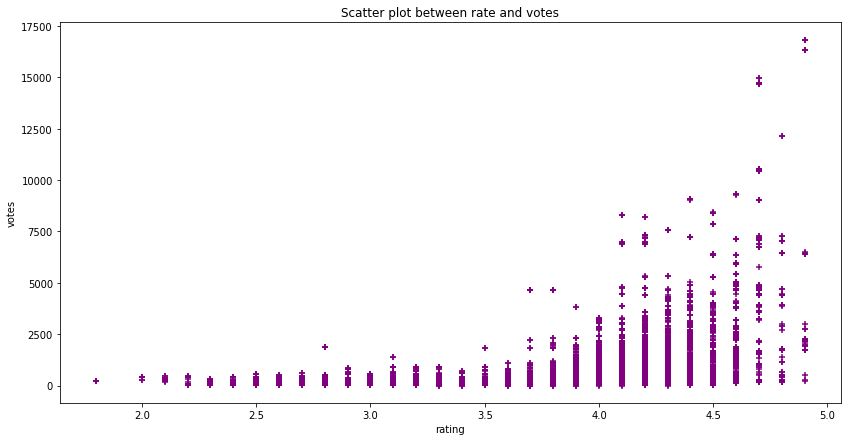

In [21]:
#lets check if there is any relationship between rate and votes

plt.scatter(zomato_data["rate"], zomato_data["votes"], marker='+',color="purple",cmap = "viridis")
plt.xlabel("rating")
plt.ylabel("votes")
plt.title("Scatter plot between rate and votes")
plt.show()

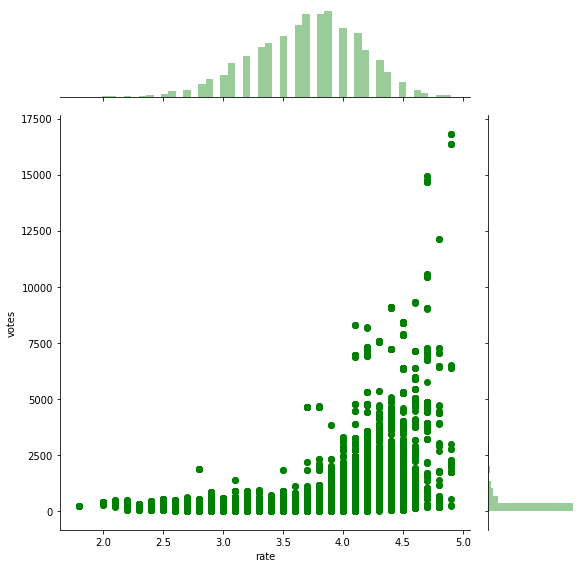

In [22]:
sns.jointplot(x = "rate", y = "votes", data = zomato_data, height=8,ratio=4, color="g")
plt.show() 

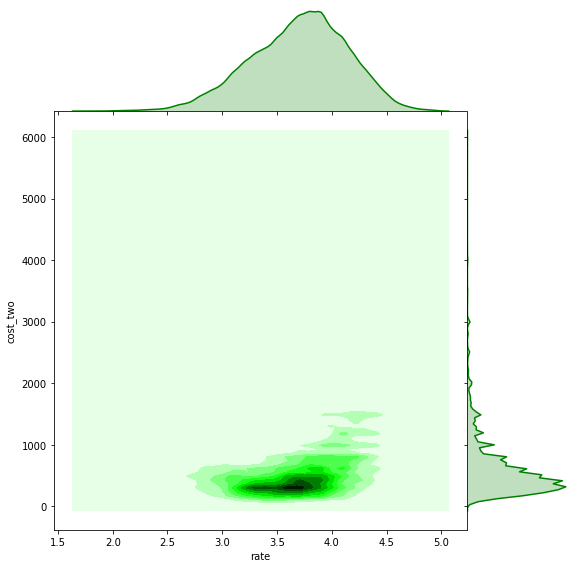

In [24]:
#similarly lets plot the relationship between rate and cost_two

sns.jointplot(x = "rate", y = "cost_two", data = zomato_data, height=8, ratio=4, kind = "kde", space=0, color="g")
plt.show()

# Correlation

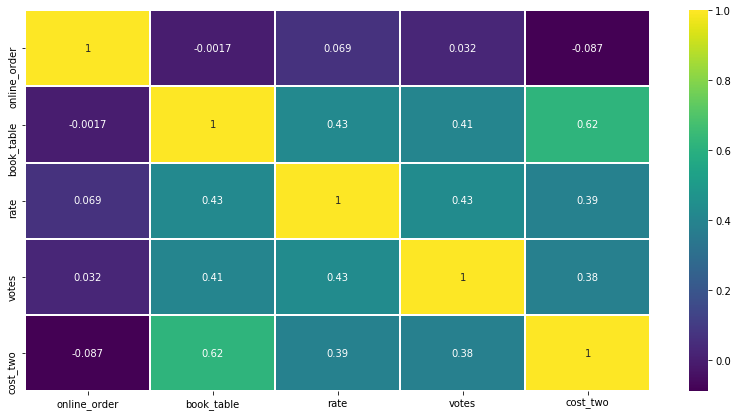

In [25]:
sns.heatmap(zomato_data.corr(), annot = True, cmap = "viridis",linecolor='white',linewidths=1)
plt.show()

# Restaurants Location

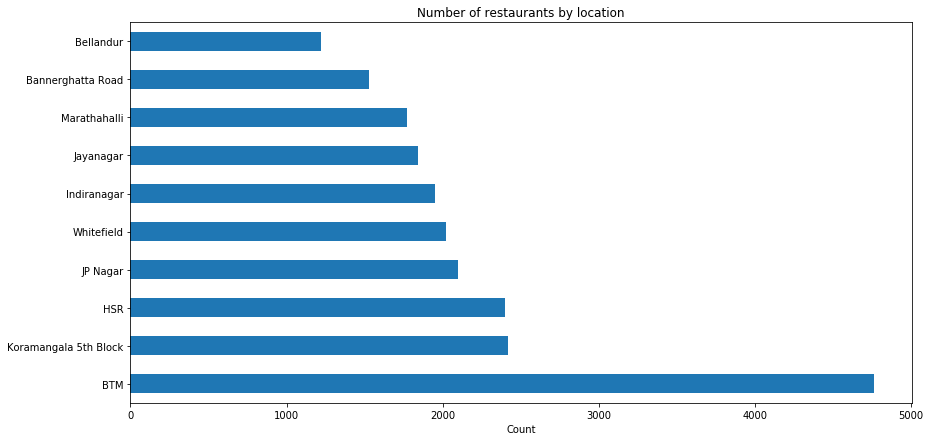

In [26]:
plt.rcParams['figure.figsize'] = 14,7
zomato_data.location.value_counts().nlargest(10).plot(kind = "barh")
plt.title("Number of restaurants by location")
plt.xlabel("Count")
plt.show()

# Restaurant Listed in

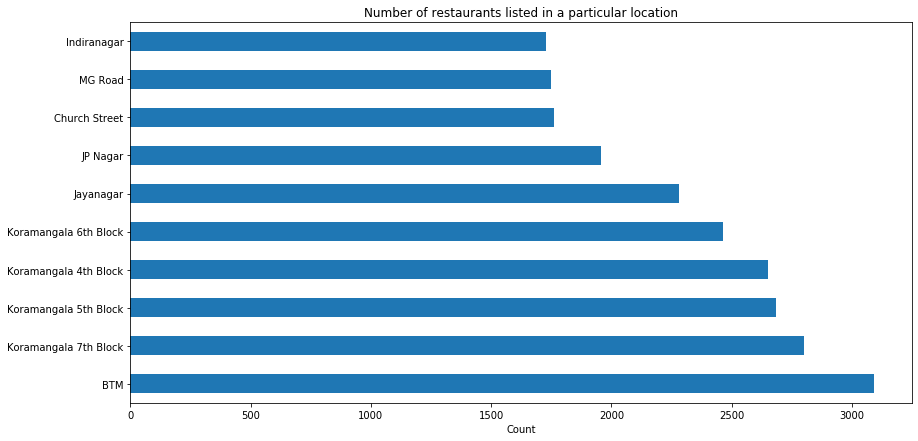

In [27]:
plt.rcParams['figure.figsize'] = 14,7
zomato_data.serve_to.value_counts().nlargest(10).plot(kind = "barh")
plt.title("Number of restaurants listed in a particular location")
plt.xlabel("Count")
plt.show()

# Online Order

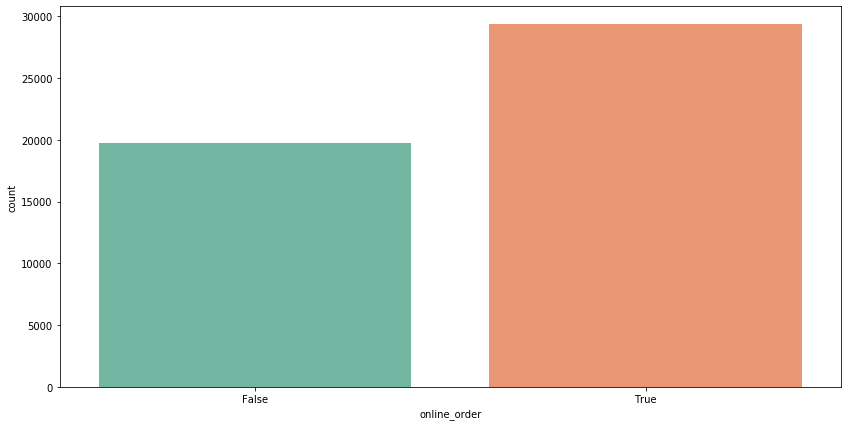

In [28]:
plt.rcParams['figure.figsize'] = 14,7
sns.countplot(zomato_data["online_order"], palette = "Set2")
plt.show()

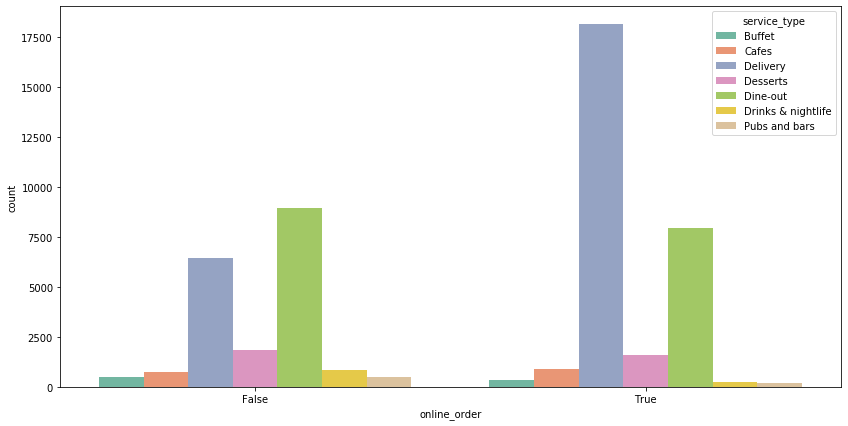

In [29]:
#lets check if restaurants listed online offer delivery or not.
plt.rcParams['figure.figsize'] = 14,7
sns.countplot(zomato_data["online_order"], palette = "Set2", hue = zomato_data["service_type"])
plt.show()

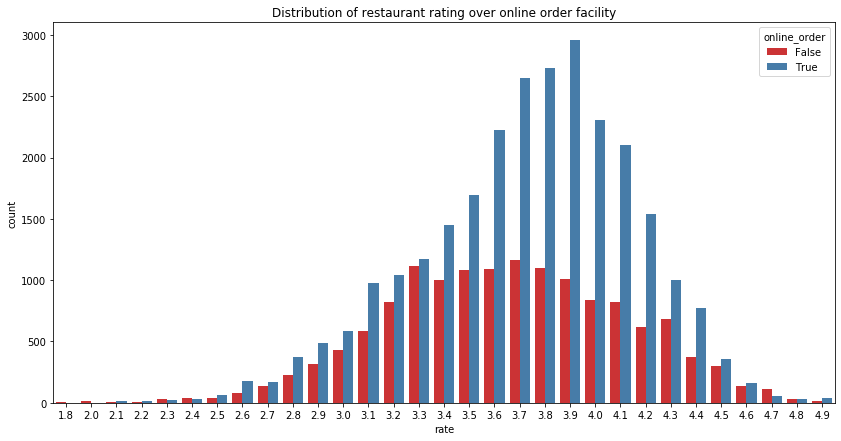

In [30]:
#checking whether online_order impacts rating of the restaurant
sns.countplot(hue = zomato_data["online_order"], palette = "Set1", x = zomato_data["rate"])
plt.title("Distribution of restaurant rating over online order facility")
plt.show()

# Booking Table

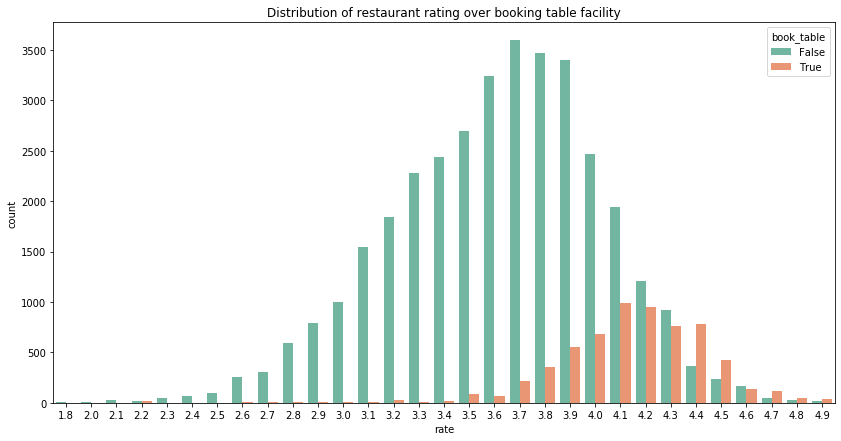

In [31]:
#rating vs booking table
sns.countplot(hue = zomato_data["book_table"], palette = "Set2", x = zomato_data["rate"])
plt.title("Distribution of restaurant rating over booking table facility")
plt.show()

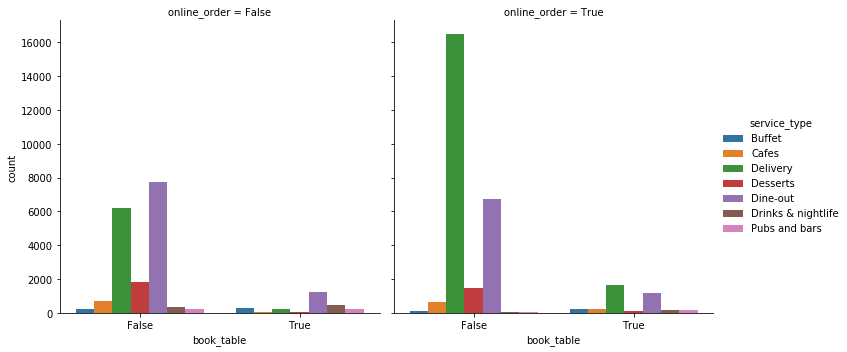

In [32]:
#Use catplot() to combine a countplot() and a FacetGrid. This allows grouping within additional categorical variables
g = sns.catplot(x="book_table", hue="service_type", col="online_order", data=zomato_data, kind="count")

# Restaurant Service Type

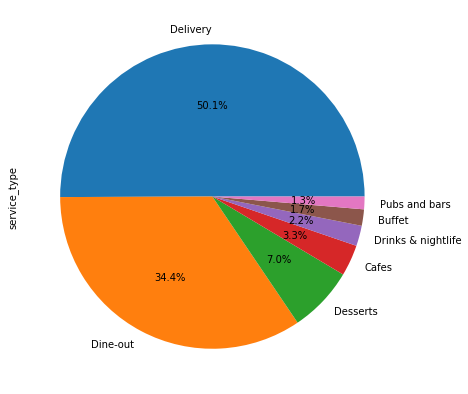

In [33]:
#check the restaurant service type

zomato_data.service_type.value_counts().plot(kind = "pie", autopct='%.1f%%')
plt.show()

Does the service type effects ratings given to the restaurant?

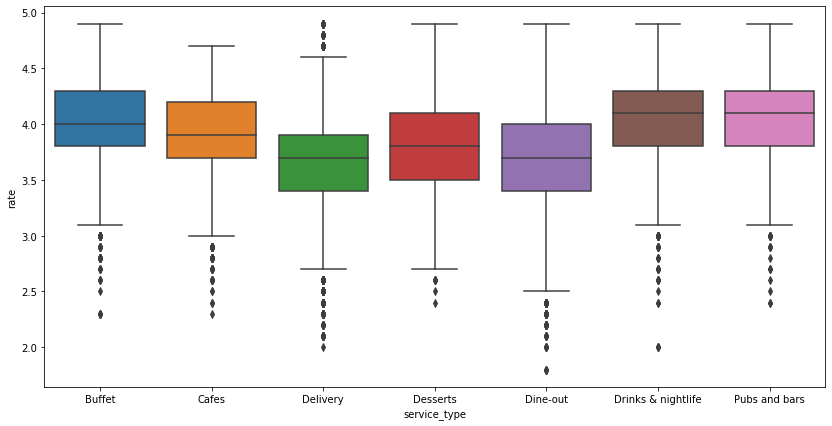

In [34]:
#ratings vs service type
sns.boxplot(x="service_type", y="rate", data = zomato_data)
plt.show()


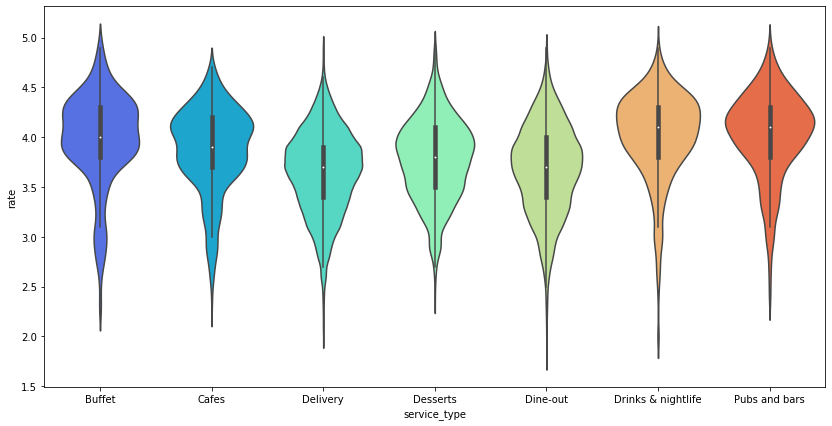

In [35]:
#lets plot swarmplot and violin plot together better understanding of rating vs service type

sns.violinplot(x = "service_type", y = "rate",data = zomato_data,palette="rainbow")
plt.show()

Biggest Restaurant Chain and Best Restaurant Chain

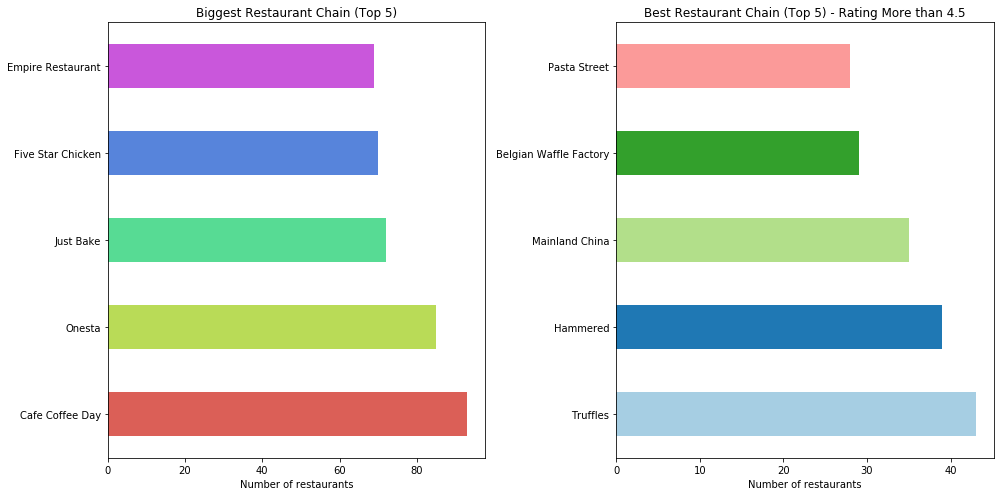

In [36]:
plt.rcParams['figure.figsize'] = 14,7
plt.subplot(1,2,1)
zomato_data.name.value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.xlabel("Number of restaurants")
plt.title("Biggest Restaurant Chain (Top 5)")

plt.subplot(1,2,2)
zomato_data[zomato_data['rate']>=4.5]['name'].value_counts().nlargest(5).plot(kind = "barh", color = sns.color_palette("Paired"))
plt.xlabel("Number of restaurants")
plt.title("Best Restaurant Chain (Top 5) - Rating More than 4.5")
plt.tight_layout()

# Top Restaurant Type

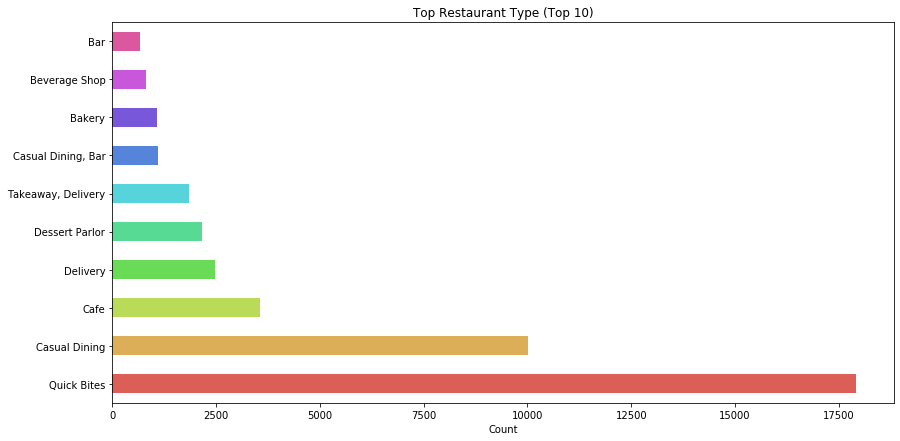

In [37]:
plt.rcParams['figure.figsize'] = 14,7
zomato_data.rest_type.value_counts().nlargest(10).plot(kind = "barh", color = sns.color_palette("hls", 10))
plt.xlabel("Count")
plt.title("Top Restaurant Type (Top 10)")
plt.show()